In [1]:
# conda install requests

In [6]:
import requests
import json
import time
import pandas as pd

In [11]:
API_KEY = 'key'
USER_AGENT = 'user'

In [12]:
# how long to pause between consecutive API requests
pause_duration = 0.3

In [13]:
import requests

url = 'http://ws.audioscrobbler.com/2.0/?method=user.get{}&user={}&api_key={}&format=json'

limit = 500 #api lets you retrieve up to 200 records per call
extended = 0 #api lets you retrieve extended data for each track, 0=no, 1=yes
page = 1 #page of results to start retrieving at


In [15]:
method = 'toptracks'
request_url = url.format(method, USER_AGENT, API_KEY, limit, extended, page)
artist_names = []
track_names = []
play_counts = []
response = requests.get(request_url).json()
for item in response[method]['track']:
    artist_names.append(item['artist']['name'])
    track_names.append(item['name'])
    play_counts.append(item['playcount'])

top_tracks = pd.DataFrame()
top_tracks['artist'] = artist_names
top_tracks['track'] = track_names
top_tracks['play_count'] = play_counts
top_tracks.to_csv('lastfm_top_tracks.csv', index=None, encoding='utf-8')
top_tracks.head(40)

,artist,track,play_count
0,La Maravillosa Orquesta del Alcohol,La vuelta,12
1,Planète Sauvage,Étude des Papillons,10
2,Enchanted Feel,Sogno Illuminum,8
3,Felix Hertzog,Schlafmittel,8
4,Guitarricadelafuente,Ya mi mama me decía,8
5,Jarabe de Palo,Tú Mandas,8
6,Jeff Birma,Shimmering Above Clouds,8
7,Clyde Boudreaux,Nepenthe,7
8,Marie Protivová,Touha,7
9,Najma Wallin,Med slutna ögon,7


In [16]:
response['toptracks']['@attr']

{'user': 'pabloferro',
 'totalPages': '4',
 'page': '1',
 'perPage': '50',
 'total': '194'}

In [17]:
tracks_n=[]
for item in response[method]['track']:
    tracks_n.append(item['name'])
    
tracks_n

['La vuelta',
 'Étude des Papillons',
 'Sogno Illuminum',
 'Schlafmittel',
 'Ya mi mama me decía',
 'Tú Mandas',
 'Shimmering Above Clouds',
 'Nepenthe',
 'Touha',
 'Med slutna ögon',
 'To Be So Lonely',
 'Watermelon Sugar',
 'Sdraiata accanto a me',
 'Kritagya',
 'Guantanamera',
 'Golden',
 'Treat People with Kindness',
 'La molinera',
 'No canto yo',
 'Endless Sky',
 'Have We Met Before?',
 'Norm and Mirza',
 'ABC',
 'El Conticinio',
 'Renewal',
 'Sömn',
 'Et øyeblikk',
 'All of Them Dreams',
 'Got Gold',
 'Rien que toi et moi',
 'Lodo',
 'Tú Me Dejaste De Querer',
 'Nacido pa ganar',
 '¡Yep!',
 'Yin yang',
 'Conduciendo y Llorando',
 'Volver - Bonus Track',
 'Parts Unknown',
 'Gone Gone',
 'My Life Is A Song For You',
 'To You Alone - Acoustic',
 'Woes',
 'Jag kommer',
 'Someone Like You',
 'Sleepy Journey',
 'Si Tú La Quieres',
 'Límite',
 'Se iluminaba',
 'Agua y Mezcal',
 'Desde las Alturas']

In [18]:
method = 'topartists'
request_url = url.format(method, USER_AGENT, API_KEY, limit, extended, page)
artist_names = []
play_counts = []
response = requests.get(request_url).json()
for item in response[method]['artist']:
    artist_names.append(item['name'])
    play_counts.append(item['playcount'])

top_art = pd.DataFrame()
top_art['artist'] = artist_names
top_art['play_count'] = play_counts
top_art.to_csv('lastfm_top_artists.csv', index=None, encoding='utf-8')
top_art.head(10)

,artist,play_count
0,Tom Rosenthal,50
1,La Maravillosa Orquesta del Alcohol,36
2,Jarabe de Palo,30
3,Guitarricadelafuente,28
4,Harry Styles,26
5,Veronica Maggio,13
6,Xoel López,13
7,Michael Bublé,12
8,nostalgia.en.los.autobuses,10
9,Enchanted Feel,9


In [19]:
method = 'toptags'
request_url = url.format(method, USER_AGENT, API_KEY, limit, extended, page)
tags=[]
play_count=[]
response = requests.get(request_url).json()

for item in response[method]['tag']:
    tags.append(item['tags'])
    play_count.append(item['playcount'])

top_tags = pd.DataFrame()
top_tags['tag'] = tags
top_tags['play_count'] = play_count
top_tags.to_csv('lastfm_top_tags.csv', index=None, encoding='utf-8')
top_tags.head(10)

,tag,play_count


In [20]:
import matplotlib.pyplot as plt

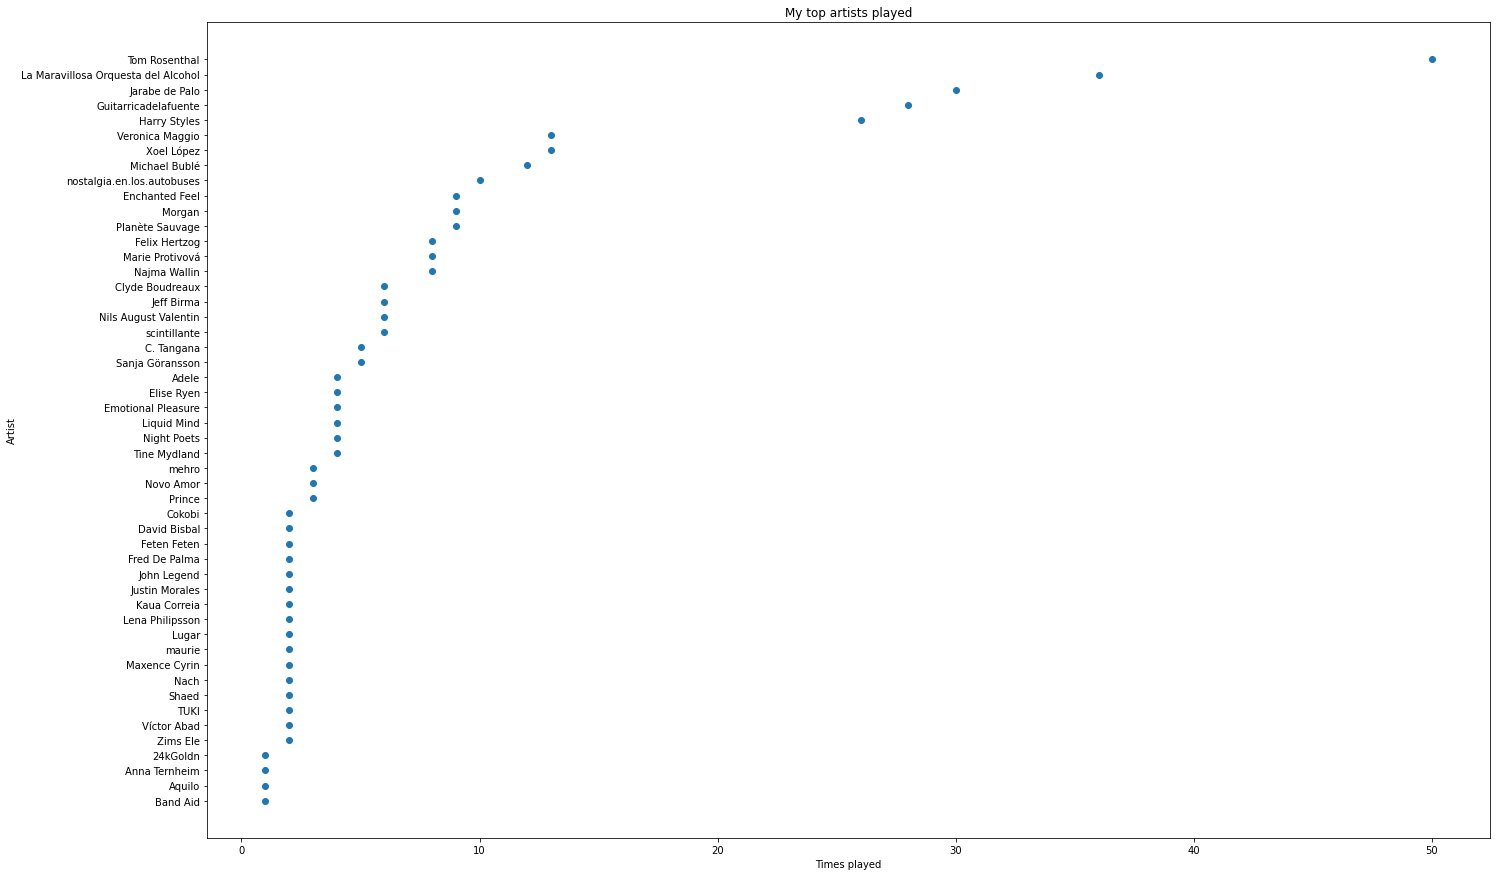

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_figwidth(23)
fig.set_figheight(15)
top_art.play_count = top_art.play_count.astype(int)
plt.plot(top_art.play_count,top_art.artist,'o')
plt.xlabel('Times played')
plt.ylabel('Artist')
plt.title('My top artists played')
ax.invert_yaxis()
plt.savefig('top_artists_chart_12dic.png')
plt.show()

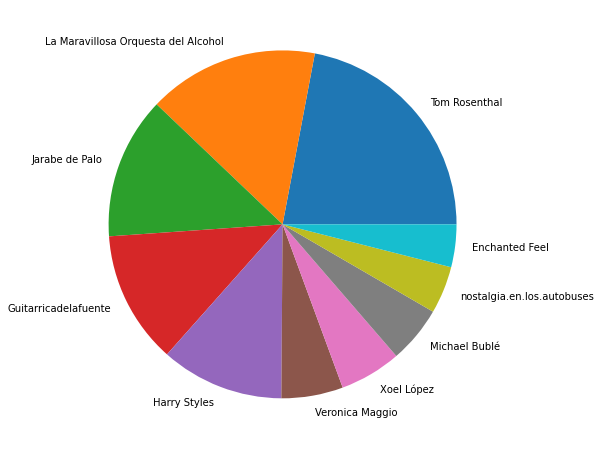

In [22]:
top_art10=top_art.head(10)
plt.figure(figsize=(8,8))
plt.pie(top_art10.play_count,labels=top_art10.artist)
plt.savefig('piechart.png')